In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
# MNIST Fashion Dataset.
# 60,000 images for testing, 10,000 images for validation/testing

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape # 60,000 images, each 28x28 (784 pixels)

(60000, 28, 28)

In [4]:
type(train_images)

numpy.ndarray

In [5]:
train_images[0,23,23] # value of one pixel (grayscale image)

194

In [6]:
# Labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

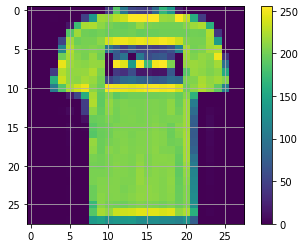

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

In [8]:
# Data pre-processing
train_images = train_images / 255.0 # Change range from 0-255 to 0-1

test_images = test_images / 255.0

In [9]:
# Using sequential model with three different layers
# The model represents a feed-forward nerual network (one that passes values from left to right).
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1) Flatten --> takes the 28x28 and turns it into 1D
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) Dense --> all previous neuron is connected to the each neuron here
    keras.layers.Dense(10, activation='sigmoid') # output layer (3) [Softmax makes the output into a probability distribution]. Has 10 neurons since we have 10 types of labels
])

In [10]:
# Compiling the Model (defining the loss function, optimizer, and metrics to track):
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Hyper-parameters: things that we can change (i.e. activation functino, optimizer, loss function, metrics, # of neurons per layer)
# Hyper-parameter tuning: Changing hyper-parameters  

In [11]:
# Training the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6251 - accuracy: 0.7832
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3866 - accuracy: 0.8610
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3364 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3144 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2644 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2601 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [12]:
# Evalutaing model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) # The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3553 - accuracy: 0.8753
Test accuracy: 0.8752999901771545


In [ ]:
# Prediciting
# predictions = model.predict(list(test_images[0]))
predictions = model.predict(test_images)
print(predictions[0]) # will show probability distribution for the model
print(np.argmax(predictions[0])) # will return index of highest element
print(class_names[np.argmax(predictions[0])]) # will return index of highest element

[8.7994977e-08 9.5468424e-09 6.7323604e-08 3.2868482e-11 6.4984988e-08
 8.7426854e-03 5.8376070e-08 1.4622517e-02 7.3666370e-06 9.7662717e-01]
9
Ankle boot


In [ ]:
test_images.shape

(10000, 28, 28)

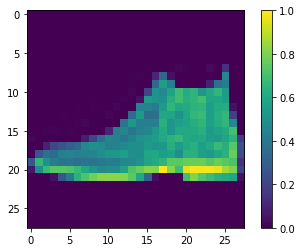

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 34


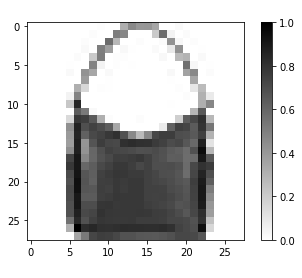

In [ ]:
#Verifying Predictions
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
